# İş Problemi 
###### Özellikleri belirtildiğinde kişilerin diyabet hastası olup olmadıklarını tahmin  edebilecek bir makine öğrenmesi modeli geliştirilmesi istenmektedir. Modeli  geliştirmeden önce gerekli olan veri analizi ve özellik mühendisliği adımlarını  gerçekleştirmeniz beklenmektedir

# Veri Seti Hikayesi

###### Veri seti ABD'deki Ulusal Diyabet-Sindirim-Böbrek Hastalıkları Enstitüleri'nde tutulan büyük veri setinin parçasıdır. ABD'deki Arizona Eyaleti'nin en büyük 5. şehri olan Phoenix şehrinde yaşayan 21 yaş ve üzerinde olan Pima Indian kadınları üzerinde yapılan diyabet araştırması için kullanılan verilerdir.
###### Hedef değişken "outcome" olarak belirtilmiş olup; 1 diyabet test sonucunun pozitif oluşunu, 0 ise negatif oluşunu belirtmektedir.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv("C:/Users/Ali Can/Desktop/Miuul/FeatureEngineering/datasets/diabetes.csv")
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###### Pregnancies = Hamilelik sayısı
###### Glucose = Oral glikoz tolerans testinde 2 saatlik plazma glikoz konsantrasyonu
###### Blood Pressure = Kan Basıncı (Küçük tansiyon) (mm Hg)
###### SkinThickness = Cilt Kalınlığı
###### Insulin = saatlik serum insülini (mu U/ml)
###### DiabetesPedigreeFunction = Fonksiyon (Oral glikoz tolerans testinde 2 saatlik plazma glikoz konsantrasyonu)
###### BMI =  Vücut kitle endeksi
###### Age = Yaş (yıl)
###### Outcome = Hastalığa sahip (1) ya da değil (0)

In [3]:
pd.set_option("display.max_columns",None)
pd.set_option("display.width",500)
pd.set_option("display.max_rows",None)
pd.set_option("display.float_format",lambda x:"%.3f" %x)

# Görev 1 : Keşifçi Veri Analizi

###### Adım 1: Genel resmi inceleyiniz

In [4]:
def df_summary(dataframe,head=5):
    print("######## SHAPE ####### \n")
    print(dataframe.shape)
    print("######## TYPES ####### \n")
    print(dataframe.dtypes)
    print("######## HEAD ######## \n")
    print(dataframe.head(head))
    print("######## TAIL ######## \n")
    print(dataframe.tail())
    print("######## NA ########## \n")
    print(dataframe.isnull().sum())

In [5]:
df_summary(df)

######## SHAPE ####### 

(768, 9)
######## TYPES ####### 

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object
######## HEAD ######## 

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin    BMI  DiabetesPedigreeFunction  Age  Outcome
0            6      148             72             35        0 33.600                     0.627   50        1
1            1       85             66             29        0 26.600                     0.351   31        0
2            8      183             64              0        0 23.300                     0.672   32        1
3            1       89             66             23       94 28.100                     0.167   21        0
4            0      137     

###### Adım 2: Numerik ve kategorik değişkenleri yakalayınız.

In [6]:
def grab_col_names(dataframe,cat_th = 10,car_th = 20):
    cat_cols = [col for col in dataframe.columns if dataframe[col].dtype == "O"]
    num_but_cat = [col for col in dataframe.columns if dataframe[col].dtype != "O" and dataframe[col].nunique() < cat_th]
    cat_but_car = [cor for col in dataframe.columns if dataframe[col].dtype == "O" and dataframe[col].nunique() > car_th]
    
    cat_cols = cat_cols + num_but_cat
    cat_cols = [col for col in cat_cols if col not in cat_but_car]
    
    num_cols = [col for col in dataframe.columns if dataframe[col].dtype != "O"]
    num_cols = [col for col in num_cols if col not in num_but_cat]
    
    print(f"Observations: {dataframe.shape[0]}")
    print(f"Variables: {dataframe.shape[1]}")
    print(f"cal_cols : {len(cat_cols)}")
    print(f"num_cols : {len(num_cols)}")
    print(f"cat_but_car : {len(cat_but_car)}")
    print(f"num_but_cat : {len(num_but_cat)}")
    
    return cat_cols,num_cols,cat_but_car

In [7]:
 cat_cols,num_cols,cat_but_car = grab_col_names(df)

Observations: 768
Variables: 9
cal_cols : 1
num_cols : 8
cat_but_car : 0
num_but_cat : 1


In [8]:
cat_cols

['Outcome']

In [9]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

###### Adım 3: Numerik ve kategorik değişkenlerin analizini yapınız.

In [10]:
def cat_summary(dataframe,col_name,plot=False):
    print(pd.DataFrame({col_name : dataframe[col_name].value_counts(),
                        "Ratio" : dataframe[col_name].value_counts() / len(dataframe[col_name] * 100)}))
    if plot:
        sns.countplot(data=dataframe,x=dataframe[col_name])
        plt.show(block = True)

   Outcome  Ratio
0      500  0.651
1      268  0.349


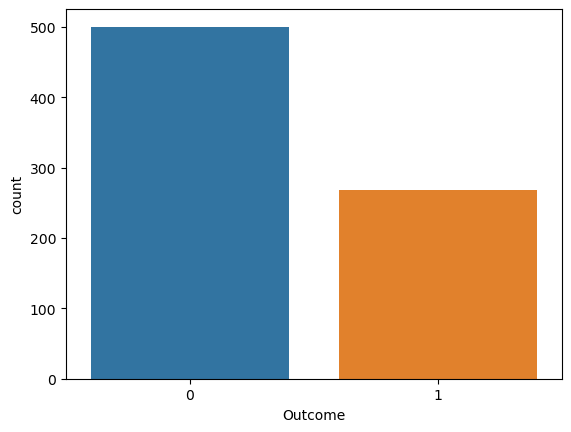

In [11]:
for col in cat_cols:
    cat_summary(df,col,True)

In [12]:
def num_summary(dataframe,col_name,plot=True):
    print(pd.DataFrame({col_name : dataframe[col_name].describe().T}))
    
    if plot:
        sns.histplot(data=dataframe,x=dataframe[col_name])
        plt.grid()
        plt.show(block = True)

       Pregnancies
count      768.000
mean         3.845
std          3.370
min          0.000
25%          1.000
50%          3.000
75%          6.000
max         17.000


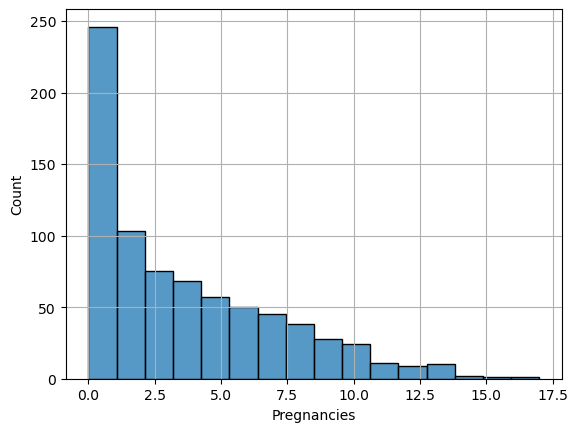

       Glucose
count  768.000
mean   120.895
std     31.973
min      0.000
25%     99.000
50%    117.000
75%    140.250
max    199.000


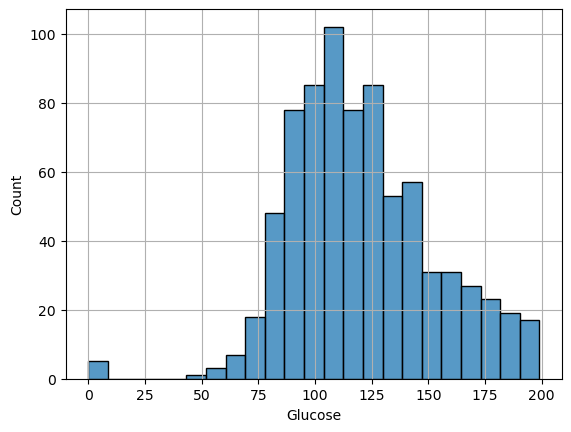

       BloodPressure
count        768.000
mean          69.105
std           19.356
min            0.000
25%           62.000
50%           72.000
75%           80.000
max          122.000


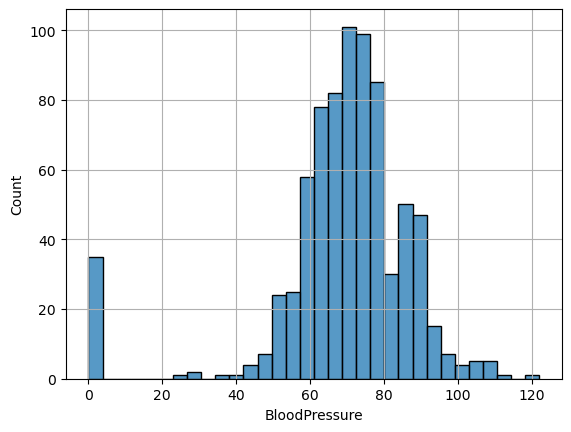

       SkinThickness
count        768.000
mean          20.536
std           15.952
min            0.000
25%            0.000
50%           23.000
75%           32.000
max           99.000


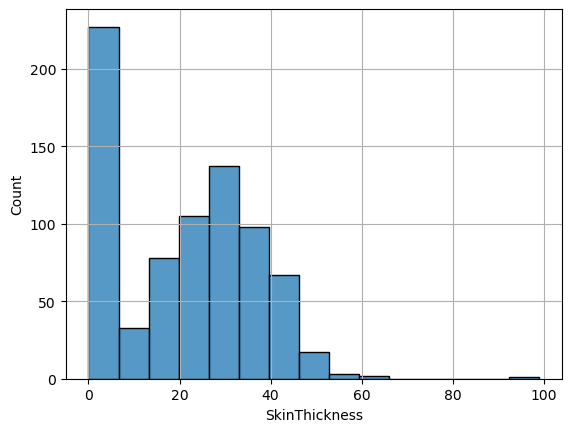

       Insulin
count  768.000
mean    79.799
std    115.244
min      0.000
25%      0.000
50%     30.500
75%    127.250
max    846.000


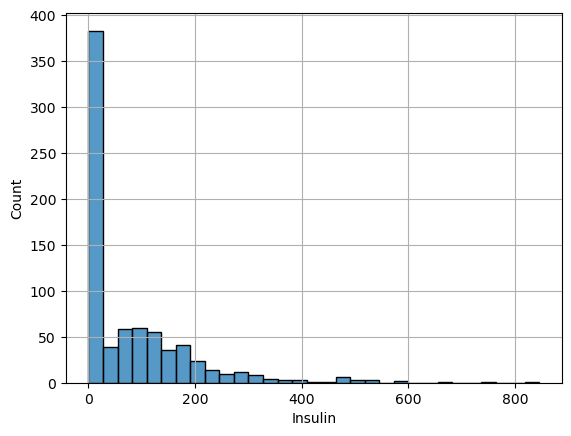

          BMI
count 768.000
mean   31.993
std     7.884
min     0.000
25%    27.300
50%    32.000
75%    36.600
max    67.100


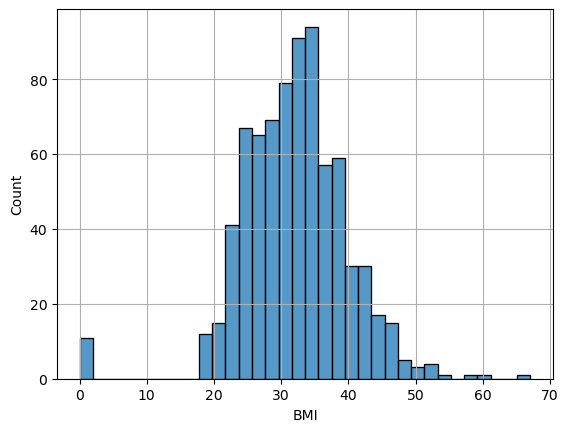

       DiabetesPedigreeFunction
count                   768.000
mean                      0.472
std                       0.331
min                       0.078
25%                       0.244
50%                       0.372
75%                       0.626
max                       2.420


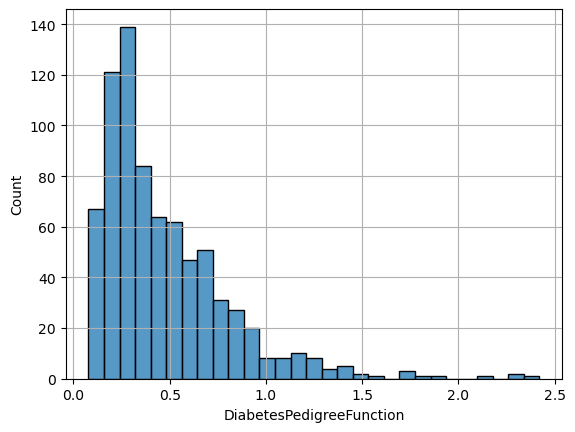

          Age
count 768.000
mean   33.241
std    11.760
min    21.000
25%    24.000
50%    29.000
75%    41.000
max    81.000


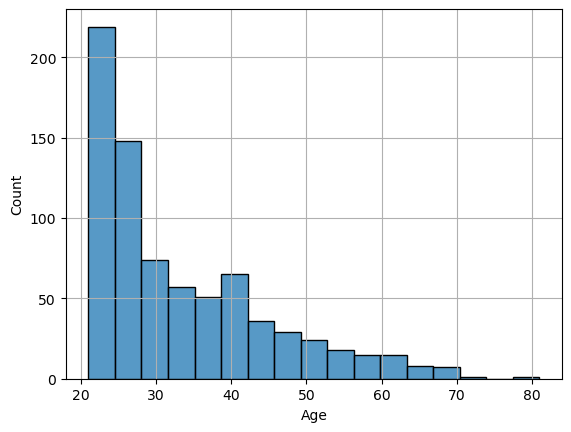

In [13]:
for col in num_cols:
    num_summary(df,col,True)

###### Adım 4: Hedef değişken analizi yapınız. (Kategorik değişkenlere göre hedef değişkenin ortalaması, hedef değişkene göre numerik değişkenlerin ortalaması)

###### Bu kısımda kategorik değişken sadece hedef degişken olduğu için kategorik değişken analizi yapmamıza gerek yok

In [14]:
def num_cols_mean(dataframe,target,col_name):
    print(pd.DataFrame({col_name : dataframe.groupby(target)[col_name].mean()}))
    print("############")

In [15]:
for col in num_cols:
    num_cols_mean(df,"Outcome",col)

         Pregnancies
Outcome             
0              3.298
1              4.866
############
         Glucose
Outcome         
0        109.980
1        141.257
############
         BloodPressure
Outcome               
0               68.184
1               70.825
############
         SkinThickness
Outcome               
0               19.664
1               22.164
############
         Insulin
Outcome         
0         68.792
1        100.336
############
           BMI
Outcome       
0       30.304
1       35.143
############
         DiabetesPedigreeFunction
Outcome                          
0                           0.430
1                           0.550
############
           Age
Outcome       
0       31.190
1       37.067
############


###### Adım 5: Aykırı gözlem analizi yapınız.

In [16]:
def outlier_th(dataframe,col_name,q1 = 0.25,q3 = 0.75,plot=False):
    quar1 = dataframe[col_name].quantile(q1)
    quar3 = dataframe[col_name].quantile(q3)
    iqr = quar3 - quar1
    
    up_limit = quar3 + 1.5 * iqr
    low_limit = quar1 - 1.5 * iqr
    
    if plot:
        sns.boxplot(x=dataframe[col_name])
        plt.show(block=True)
        
    return low_limit,up_limit

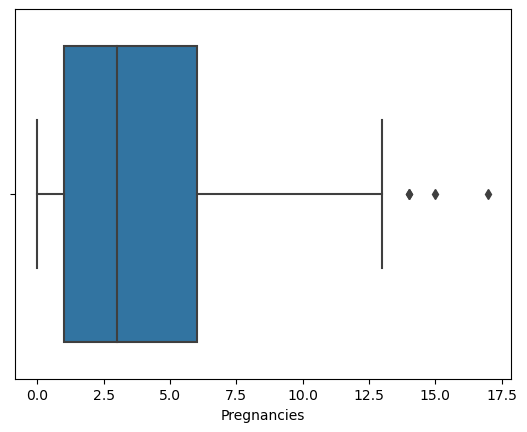

Pregnancies outlier th (-6.5, 13.5)
#########


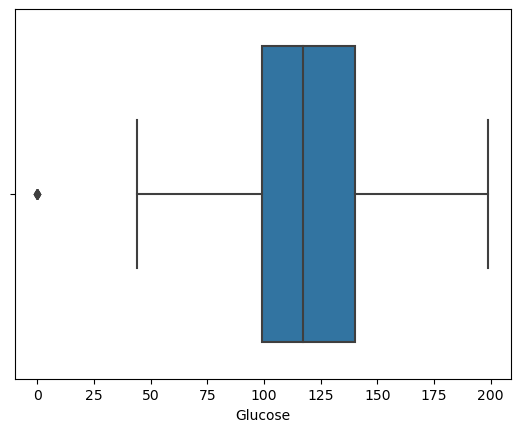

Glucose outlier th (37.125, 202.125)
#########


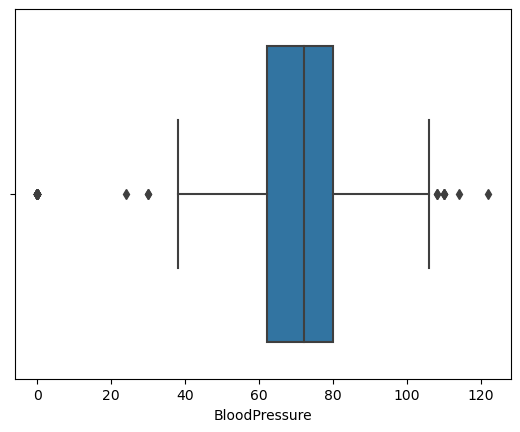

BloodPressure outlier th (35.0, 107.0)
#########


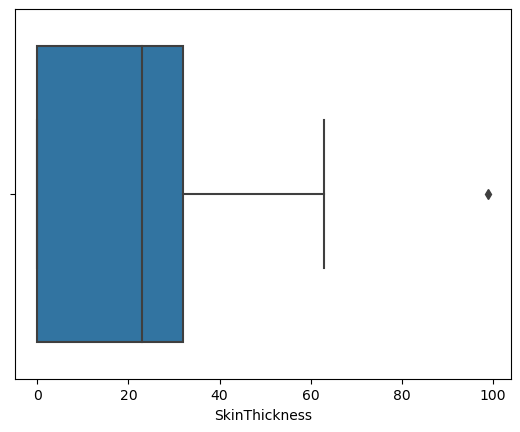

SkinThickness outlier th (-48.0, 80.0)
#########


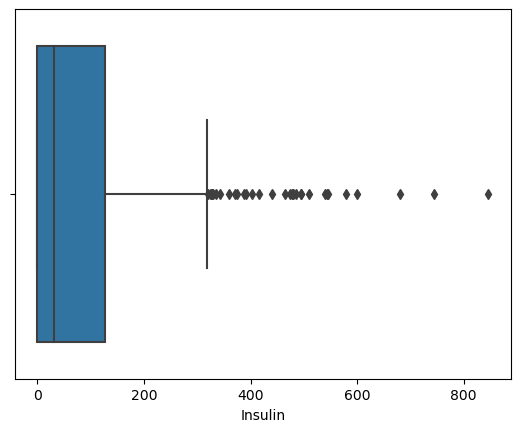

Insulin outlier th (-190.875, 318.125)
#########


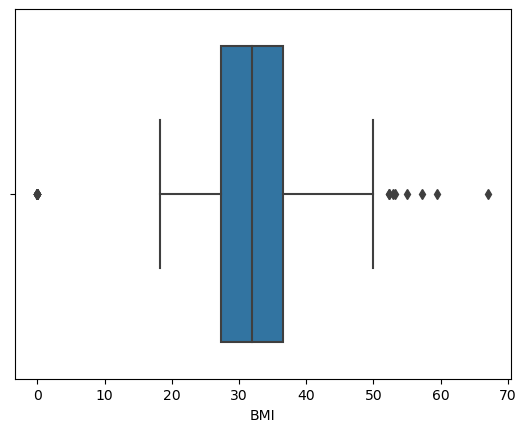

BMI outlier th (13.35, 50.550000000000004)
#########


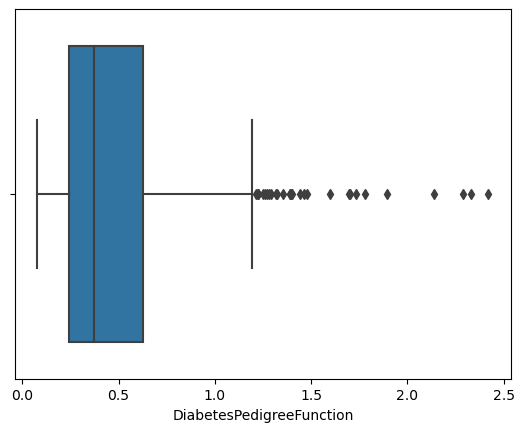

DiabetesPedigreeFunction outlier th (-0.32999999999999996, 1.2)
#########


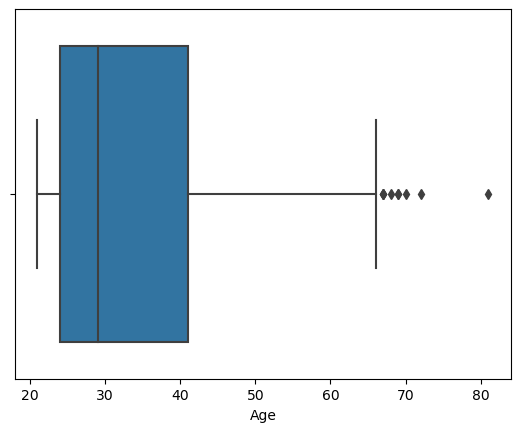

Age outlier th (-1.5, 66.5)
#########


In [17]:
for col in num_cols:
    print(f"{col} outlier th",outlier_th(df,col,plot=True))
    print("#########")

In [18]:
def check_outlier(dataframe,col_name):
    low_limit,up_limit = outlier_th(dataframe,col_name)
    
    if dataframe[(dataframe[col_name] < low_limit) | (dataframe[col_name] > up_limit)].any(axis=None):
        return True
    else:
        return False

In [19]:
for col in num_cols:
    print(f"{col} ",check_outlier(df,col))

Pregnancies  True
Glucose  True
BloodPressure  True
SkinThickness  True
Insulin  True
BMI  True
DiabetesPedigreeFunction  True
Age  True


In [20]:
# Bütün degişkenler aykırı deger icermekte ilerleyen süreçte bunları düzenleyecegiz

###### Adım 6: Eksik gözlem analizi yapınız.

In [21]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

###### Adım 7: Korelasyon analizi yapınız.

In [22]:
corr = df.corr()
corr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000,0.129,0.141,-0.082,-0.074,0.018,-0.034,0.544,0.222
Glucose,0.129,1.000,0.153,0.057,0.331,0.221,0.137,0.264,0.467
BloodPressure,0.141,0.153,1.000,0.207,0.089,0.282,0.041,0.240,0.065
SkinThickness,-0.082,0.057,0.207,1.000,0.437,0.393,0.184,-0.114,0.075
Insulin,-0.074,0.331,0.089,0.437,1.000,0.198,0.185,-0.042,0.131
BMI,0.018,0.221,0.282,0.393,0.198,1.000,0.141,0.036,0.293
DiabetesPedigreeFunction,-0.034,0.137,0.041,0.184,0.185,0.141,1.000,0.034,0.174
Age,0.544,0.264,0.240,-0.114,-0.042,0.036,0.034,1.000,0.238
Outcome,0.222,0.467,0.065,0.075,0.131,0.293,0.174,0.238,1.000


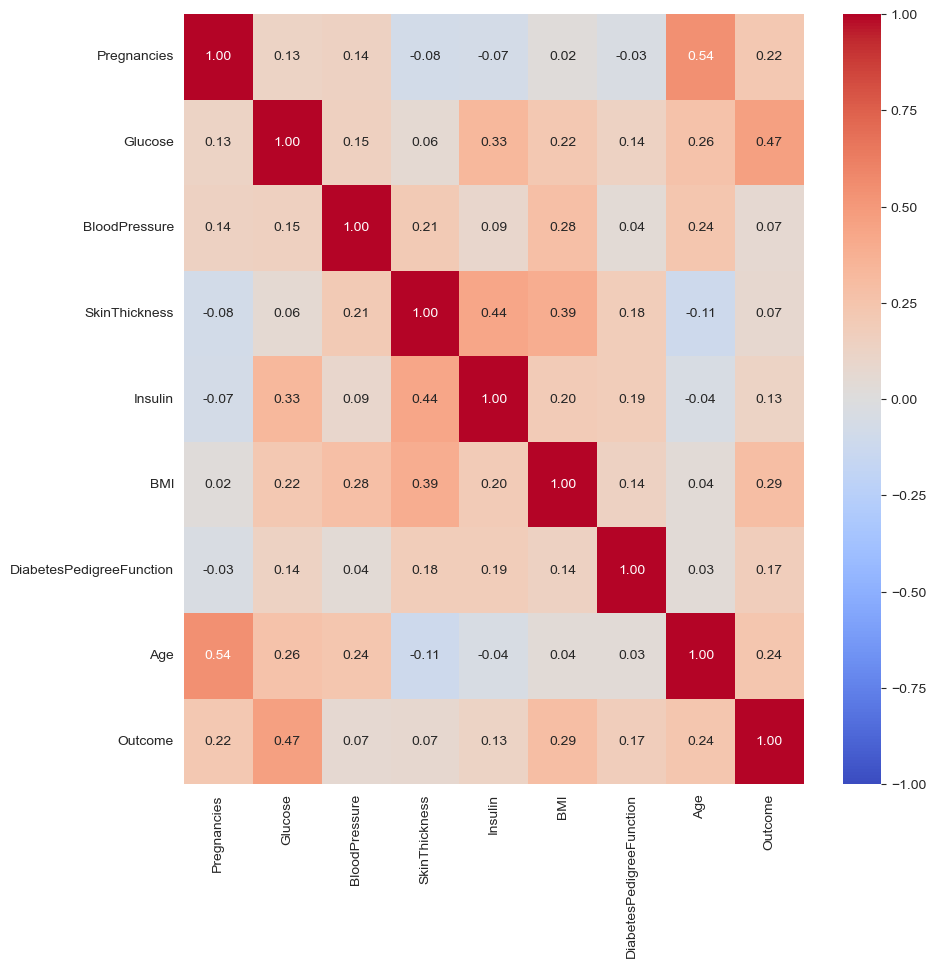

In [23]:
sns.set({"figure.figsize":(10,10)})
sns.heatmap(corr,cmap="coolwarm",vmin=-1,vmax=1,annot=True,fmt=".2f")
plt.show()

# Görev 2 : Feature Engineering

##### Adım 1: Eksik ve aykırı değerler için gerekli işlemleri yapınız. Veri setinde eksik gözlem bulunmamakta ama Glikoz, Insulin vb. değişkenlerde 0 değeri içeren gözlem birimleri eksik değeri ifade ediyor olabilir. Örneğin; bir kişinin glikoz veya insulin değeri 0 olamayacaktır. Bu durumu dikkate alarak sıfır değerlerini ilgili değerlerde NaN olarak atama yapıp sonrasında eksik değerlere işlemleri uygulayabilirsiniz.

In [24]:
missing_cols = [col for col in df.columns if df[df[col] == 0].any(axis=None) > 0 and col not in ["Pregnancies","Outcome"]]
missing_cols

['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

In [25]:
for col in missing_cols:
    df.loc[df[col] == 0,col] = np.nan

In [26]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [27]:
def fill_with_mean(dataframe,col_name):
    dataframe[col_name].fillna(dataframe[col_name].mean(),inplace=True)

In [28]:
def fill_with_target_mean(dataframe,target,col_name):
    dataframe[col_name].fillna(dataframe.groupby(target)[col_name].transform("mean"),inplace=True)

In [29]:
for col in ["Glucose","BloodPressure","SkinThickness","BMI"]:
    fill_with_mean(df,col)

In [30]:
fill_with_target_mean(df,"Outcome","Insulin")

In [31]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [32]:
for col in num_cols:
    print(f"{col} Aykırı deger sınırı:",outlier_th(df,col))
    print(f"{col} Aykırı Deger var :",check_outlier(df,col))

Pregnancies Aykırı deger sınırı: (-6.5, 13.5)
Pregnancies Aykırı Deger var : True
Glucose Aykırı deger sınırı: (39.0, 201.0)
Glucose Aykırı Deger var : False
BloodPressure Aykırı deger sınırı: (40.0, 104.0)
BloodPressure Aykırı Deger var : True
SkinThickness Aykırı deger sınırı: (14.5, 42.5)
SkinThickness Aykırı Deger var : True
Insulin Aykırı deger sınırı: (-6.519230769230774, 334.86538461538464)
Insulin Aykırı Deger var : True
BMI Aykırı deger sınırı: (13.849999999999998, 50.25)
BMI Aykırı Deger var : True
DiabetesPedigreeFunction Aykırı deger sınırı: (-0.32999999999999996, 1.2)
DiabetesPedigreeFunction Aykırı Deger var : True
Age Aykırı deger sınırı: (-1.5, 66.5)
Age Aykırı Deger var : True


In [33]:
def replace_with_th(dataframe,col_name):
    low_limit,up_limit = outlier_th(dataframe,col_name)
    dataframe.loc[dataframe[col_name] < low_limit,col_name] = low_limit
    dataframe.loc[dataframe[col_name] > up_limit,col_name] = up_limit

In [34]:
def remove_outliers(dataframe,col_name):
    low,up = outlier_th(dataframe,col_name)
    
    new_df = dataframe.loc[~((dataframe[col_name] > up) | (dataframe[col_name] < low))]
    
    return new_df

In [35]:
for col in num_cols:
    replace_with_th(df,col)

In [36]:
for col in num_cols:
    print(f"{col} Aykırı deger sınırı:",outlier_th(df,col))
    print(f"{col} Aykırı Deger var :",check_outlier(df,col))

Pregnancies Aykırı deger sınırı: (-6.5, 13.5)
Pregnancies Aykırı Deger var : False
Glucose Aykırı deger sınırı: (39.0, 201.0)
Glucose Aykırı Deger var : False
BloodPressure Aykırı deger sınırı: (40.0, 104.0)
BloodPressure Aykırı Deger var : False
SkinThickness Aykırı deger sınırı: (14.5, 42.5)
SkinThickness Aykırı Deger var : False
Insulin Aykırı deger sınırı: (-6.519230769230774, 334.86538461538464)
Insulin Aykırı Deger var : False
BMI Aykırı deger sınırı: (13.849999999999998, 50.25)
BMI Aykırı Deger var : False
DiabetesPedigreeFunction Aykırı deger sınırı: (-0.32999999999999996, 1.2)
DiabetesPedigreeFunction Aykırı Deger var : False
Age Aykırı deger sınırı: (-1.5, 66.5)
Age Aykırı Deger var : False


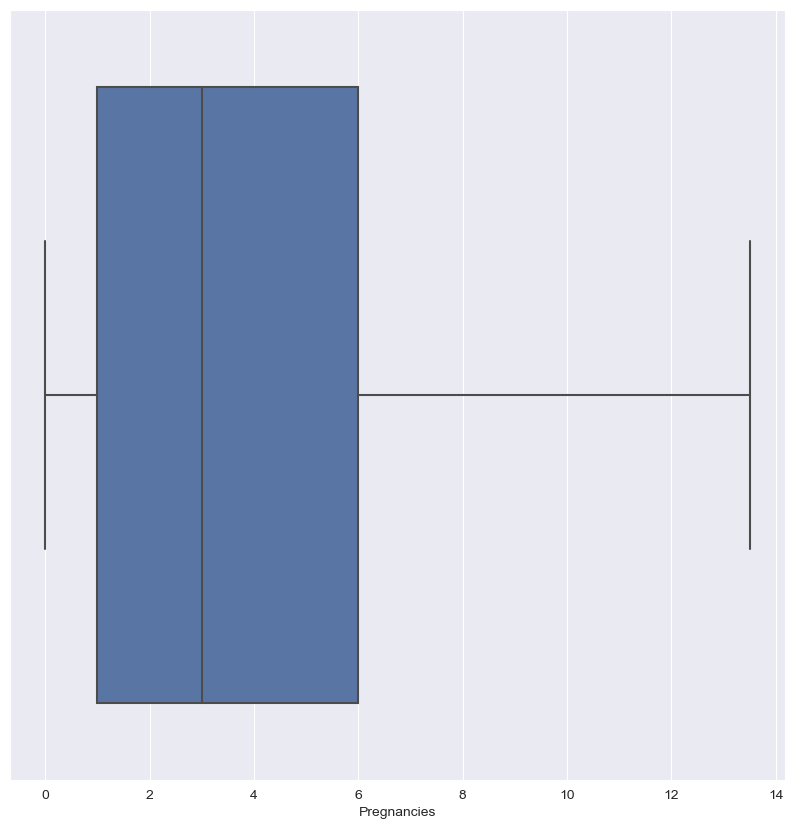

Pregnancies outlier th (-6.5, 13.5)
#########


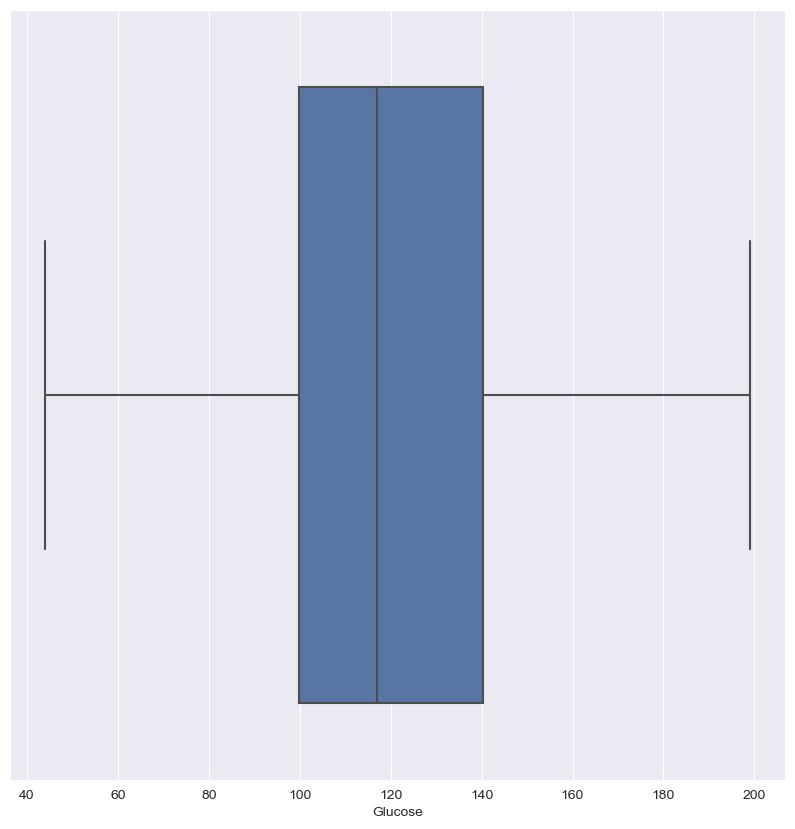

Glucose outlier th (39.0, 201.0)
#########


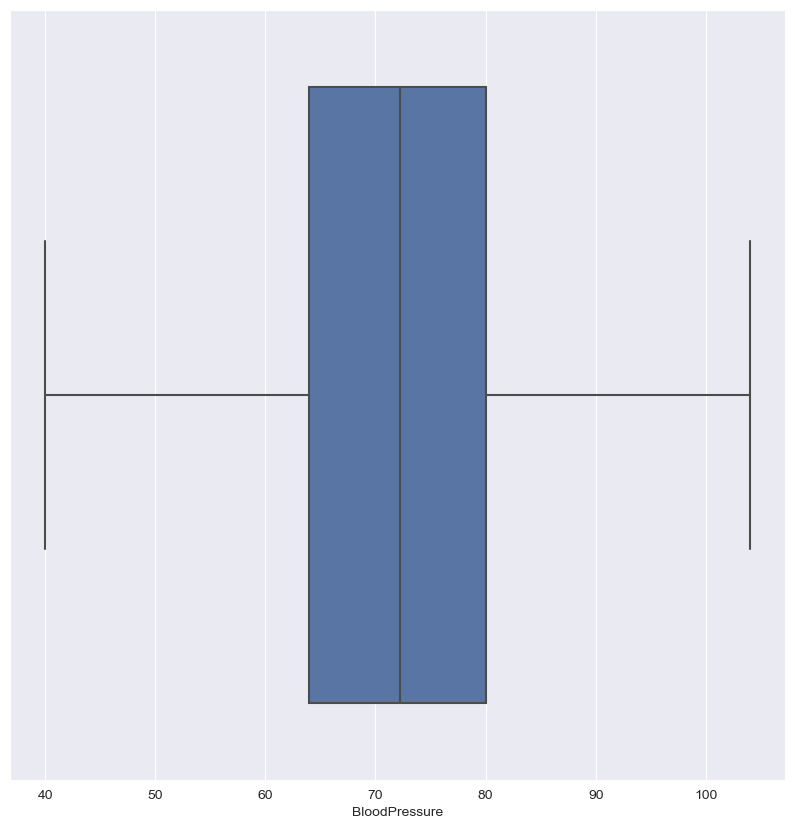

BloodPressure outlier th (40.0, 104.0)
#########


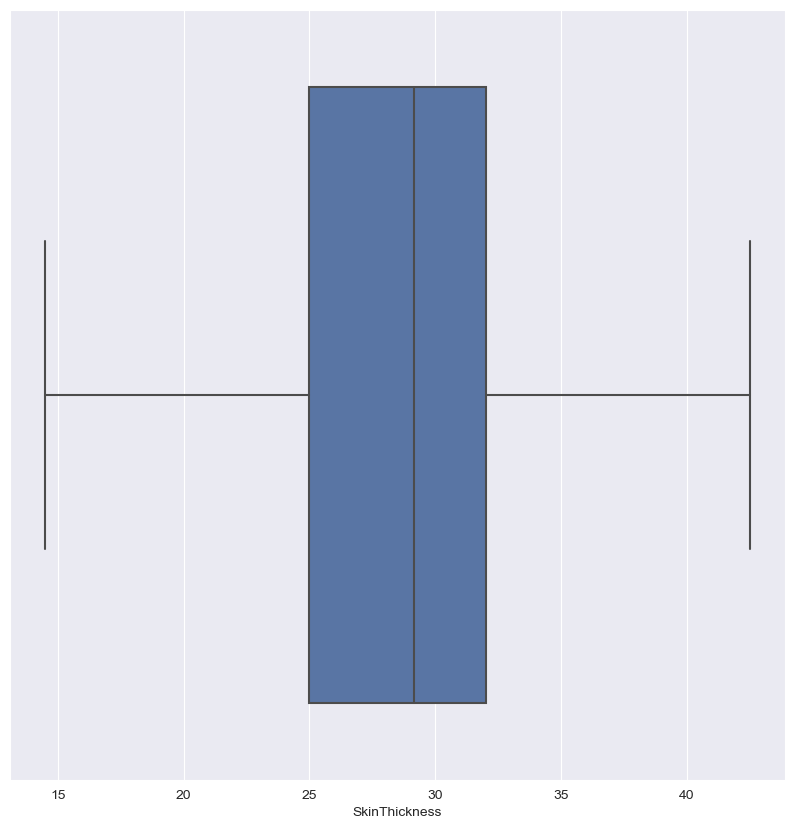

SkinThickness outlier th (14.5, 42.5)
#########


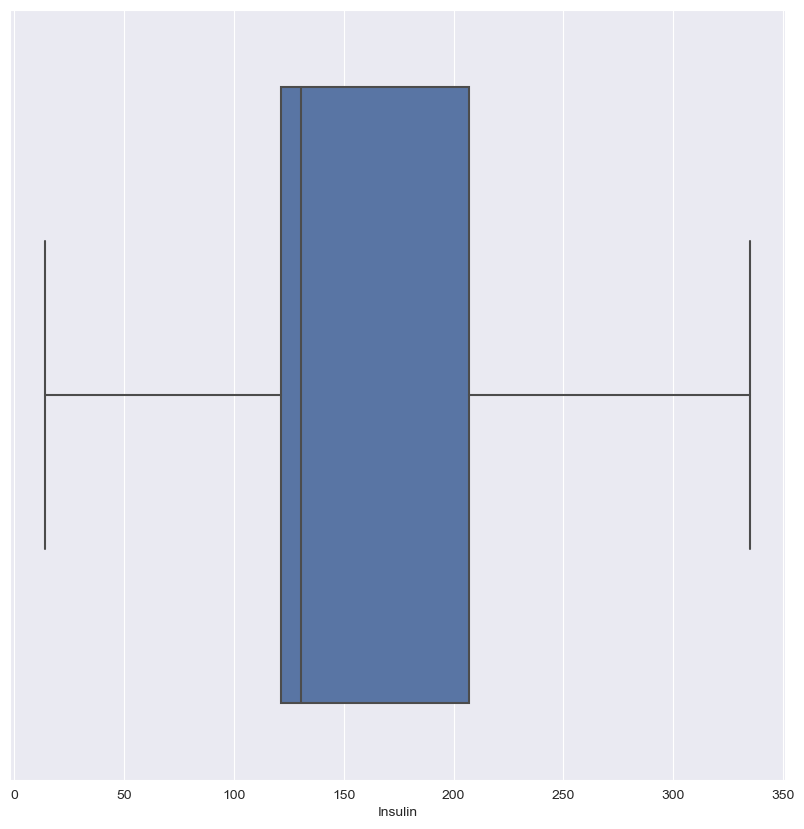

Insulin outlier th (-6.519230769230774, 334.86538461538464)
#########


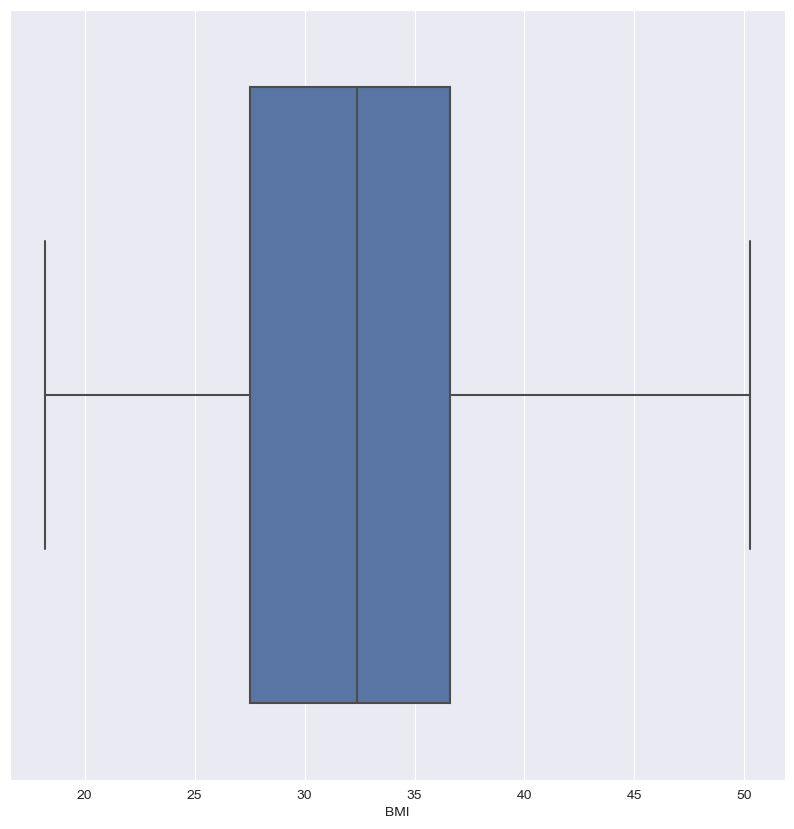

BMI outlier th (13.849999999999998, 50.25)
#########


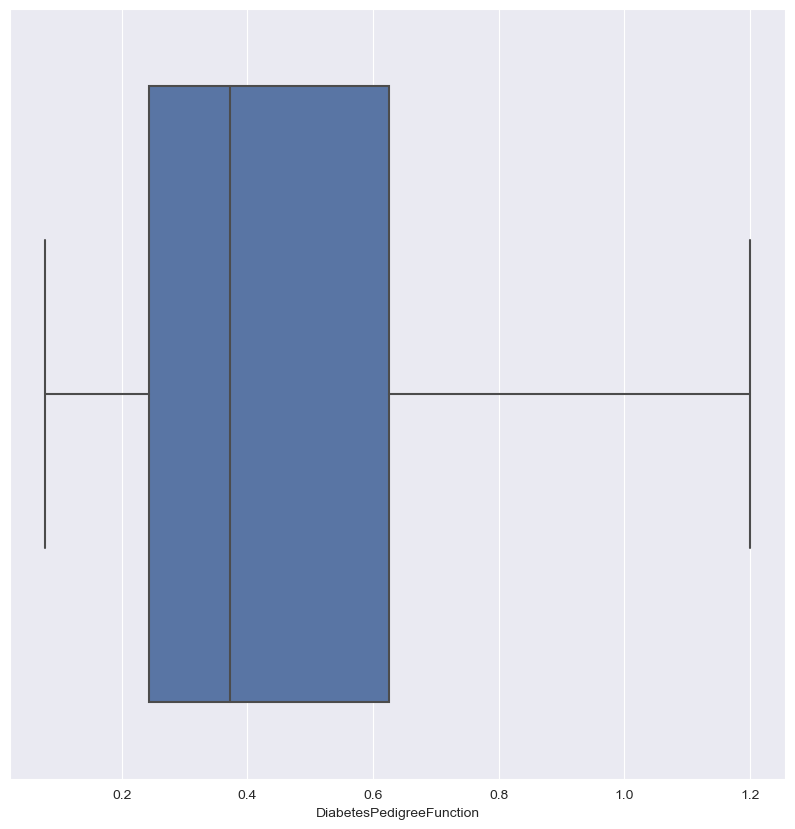

DiabetesPedigreeFunction outlier th (-0.32999999999999996, 1.2)
#########


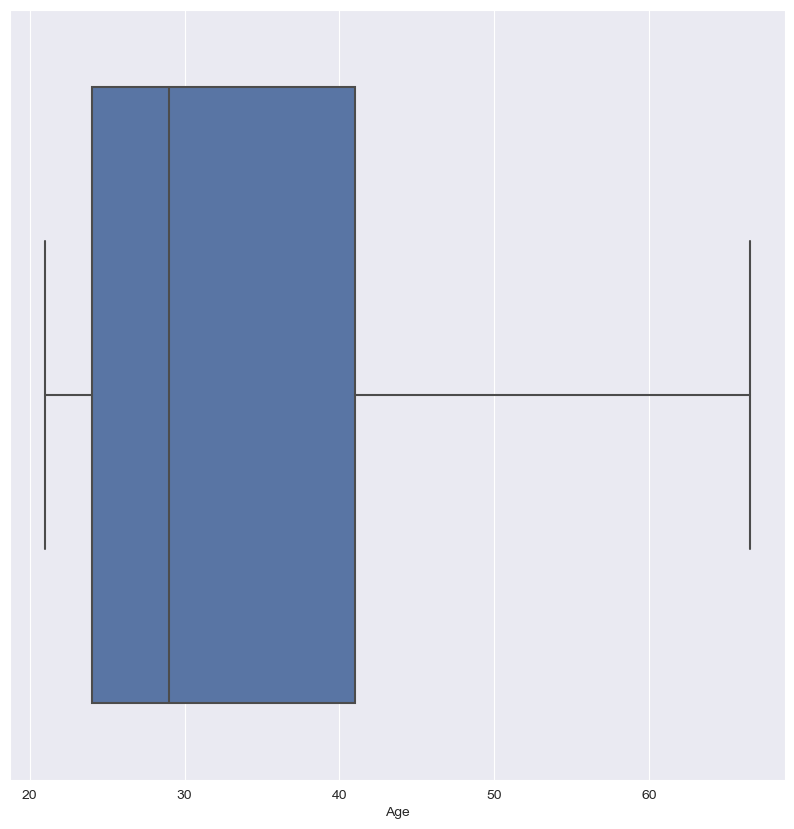

Age outlier th (-1.5, 66.5)
#########


In [37]:
for col in num_cols:
    print(f"{col} outlier th",outlier_th(df,col,plot=True))
    print("#########")

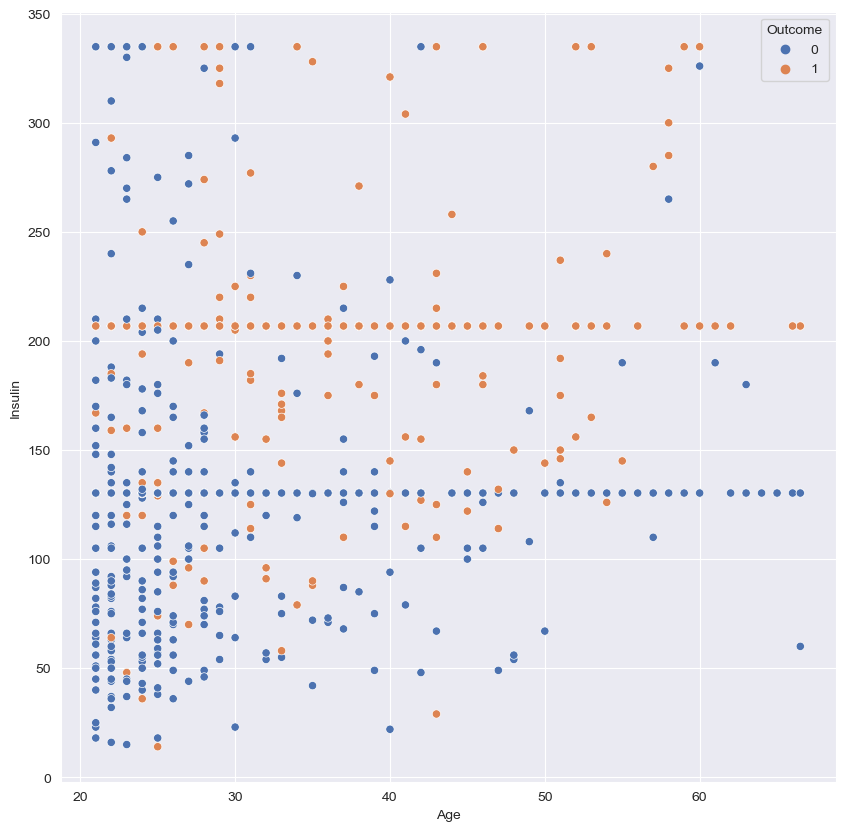

In [38]:
sns.scatterplot(x=df["Age"],y=df["Insulin"],hue=df["Outcome"])
plt.show()

###### Adım 2: Yeni değişkenler oluşturunuz

In [39]:
df[num_cols].describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.000,3.837,3.344,0.000,1.000,3.000,6.000,13.500
Glucose,768.000,121.687,30.436,44.000,99.750,117.000,140.250,199.000
BloodPressure,768.000,72.377,11.697,40.000,64.000,72.203,80.000,104.000
SkinThickness,768.000,28.912,7.443,14.500,25.000,29.153,32.000,42.500
Insulin,768.000,151.514,67.470,14.000,121.500,130.288,206.846,334.865
BMI,768.000,32.396,6.667,18.200,27.500,32.400,36.600,50.250
DiabetesPedigreeFunction,768.000,0.459,0.286,0.078,0.244,0.372,0.626,1.200
Age,768.000,33.200,11.628,21.000,24.000,29.000,41.000,66.500


In [40]:
df["New_cat_age"] = pd.cut(df["Age"],bins=[18,24,30,50,70],labels=["young","adult","get_aged","senior"])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_cat_age
0,6.000,148.000,72.000,35.000,206.846,33.600,0.627,50.000,1,get_aged
1,1.000,85.000,66.000,29.000,130.288,26.600,0.351,31.000,0,get_aged
2,8.000,183.000,64.000,29.153,206.846,23.300,0.672,32.000,1,get_aged
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,young
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,get_aged


In [41]:
df.loc[df["BMI"] <= 15,"New_cat_bmi"] = "very_underweight"
df.loc[((df["BMI"] > 15) & (df["BMI"] <= 19)),"New_cat_bmi"] = "underweight"
df.loc[((df["BMI"] > 19) & (df["BMI"] <= 25)),"New_cat_bmi"] = "normal"
df.loc[((df["BMI"] > 25) & (df["BMI"] <= 30)),"New_cat_bmi"] = "fat"
df.loc[((df["BMI"] > 30) & (df["BMI"] <= 35)),"New_cat_bmi"] = "obese"
df.loc[df["BMI"] > 35,"New_cat_bmi"] = "really_obese"

In [42]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_cat_age,New_cat_bmi
0,6.000,148.000,72.000,35.000,206.846,33.600,0.627,50.000,1,get_aged,obese
1,1.000,85.000,66.000,29.000,130.288,26.600,0.351,31.000,0,get_aged,fat
2,8.000,183.000,64.000,29.153,206.846,23.300,0.672,32.000,1,get_aged,normal
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,young,fat
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,get_aged,really_obese


In [43]:
df["GI_ratio"] = df["Glucose"] / df["Insulin"]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_cat_age,New_cat_bmi,GI_ratio
0,6.000,148.000,72.000,35.000,206.846,33.600,0.627,50.000,1,get_aged,obese,0.716
1,1.000,85.000,66.000,29.000,130.288,26.600,0.351,31.000,0,get_aged,fat,0.652
2,8.000,183.000,64.000,29.153,206.846,23.300,0.672,32.000,1,get_aged,normal,0.885
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,young,fat,0.947
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,get_aged,really_obese,0.815


In [44]:
df["New_skin_insulin"] = df["SkinThickness"] * df["Insulin"]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_cat_age,New_cat_bmi,GI_ratio,New_skin_insulin
0,6.000,148.000,72.000,35.000,206.846,33.600,0.627,50.000,1,get_aged,obese,0.716,7239.615
1,1.000,85.000,66.000,29.000,130.288,26.600,0.351,31.000,0,get_aged,fat,0.652,3778.348
2,8.000,183.000,64.000,29.153,206.846,23.300,0.672,32.000,1,get_aged,normal,0.885,6030.273
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,young,fat,0.947,2162.000
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,get_aged,really_obese,0.815,5880.000


In [45]:
df.groupby("Outcome")["SkinThickness"].mean()

Outcome
0   27.711
1   31.153
Name: SkinThickness, dtype: float64

In [46]:
df.SkinThickness.describe().T

count   768.000
mean     28.912
std       7.443
min      14.500
25%      25.000
50%      29.153
75%      32.000
max      42.500
Name: SkinThickness, dtype: float64

In [47]:
df.groupby("New_cat_age")["SkinThickness"].mean()

New_cat_age
young      26.454
adult      29.600
get_aged   30.313
senior     29.205
Name: SkinThickness, dtype: float64

In [48]:
df.loc[((df["New_cat_age"] == "young") & (df["SkinThickness"] >= 31)),"New_skin_age"] = "overfat"
df.loc[((df["New_cat_age"] == "young") & ((df["SkinThickness"] < 31) & (df["SkinThickness"] >= 25))),"New_skin_age"] = "average"
df.loc[((df["New_cat_age"] == "young") & ((df["SkinThickness"] < 25) & (df["SkinThickness"] >= 20))),"New_skin_age"] = "ideal"
df.loc[((df["New_cat_age"] == "young") & (df["SkinThickness"] < 20)),"New_skin_age"] = "lean"

In [49]:
df.loc[((df["New_cat_age"] == "adult") & (df["SkinThickness"] >= 32.5)),"New_skin_age"] = "overfat"
df.loc[((df["New_cat_age"] == "adult") & ((df["SkinThickness"] < 32.5) & (df["SkinThickness"] >= 26))),"New_skin_age"] = "average"
df.loc[((df["New_cat_age"] == "adult") & ((df["SkinThickness"] < 26) & (df["SkinThickness"] >= 21))),"New_skin_age"] = "ideal"
df.loc[((df["New_cat_age"] == "adult") & (df["SkinThickness"] < 21)),"New_skin_age"] = "lean"

In [50]:
df.loc[((df["New_cat_age"] == "get_aged") & (df["SkinThickness"] >= 33.2)),"New_skin_age"] = "overfat"
df.loc[((df["New_cat_age"] == "get_aged") & ((df["SkinThickness"] < 33.2) & (df["SkinThickness"] >= 28))),"New_skin_age"] = "average"
df.loc[((df["New_cat_age"] == "get_aged") & ((df["SkinThickness"] < 28) & (df["SkinThickness"] >= 21.5))),"New_skin_age"] = "ideal"
df.loc[((df["New_cat_age"] == "get_aged") & (df["SkinThickness"] < 21.5)),"New_skin_age"] = "lean"

In [51]:
df.loc[((df["New_cat_age"] == "senior") & (df["SkinThickness"] >= 36)),"New_skin_age"] = "overfat"
df.loc[((df["New_cat_age"] == "senior") & ((df["SkinThickness"] < 36) & (df["SkinThickness"] >= 30))),"New_skin_age"] = "average"
df.loc[((df["New_cat_age"] == "senior") & ((df["SkinThickness"] < 30) & (df["SkinThickness"] >= 25))),"New_skin_age"] = "ideal"
df.loc[((df["New_cat_age"] == "senior") & (df["SkinThickness"] < 25)),"New_skin_age"] = "lean"

In [64]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
New_cat_age                 0
New_cat_bmi                 0
GI_ratio                    0
New_skin_insulin            0
New_skin_age                0
New_preg_age_ratio          0
New_skin_bmi                0
dtype: int64

In [65]:
df.groupby("Outcome")["Pregnancies"].mean()

Outcome
0   3.298
1   4.843
Name: Pregnancies, dtype: float64

In [66]:
df["New_preg_age_ratio"] = df["Pregnancies"] / df["Age"]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_cat_age,New_cat_bmi,GI_ratio,New_skin_insulin,New_skin_age,New_preg_age_ratio,New_skin_bmi
0,6.000,148.000,72.000,35.000,206.846,33.600,0.627,50.000,1,get_aged,obese,0.716,7239.615,overfat,0.120,1176.000
1,1.000,85.000,66.000,29.000,130.288,26.600,0.351,31.000,0,get_aged,fat,0.652,3778.348,average,0.032,771.400
2,8.000,183.000,64.000,29.153,206.846,23.300,0.672,32.000,1,get_aged,normal,0.885,6030.273,average,0.250,679.275
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,young,fat,0.947,2162.000,ideal,0.048,646.300
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,get_aged,really_obese,0.815,5880.000,overfat,0.000,1508.500


In [67]:
df.groupby("Outcome")["New_preg_age_ratio"].mean()

Outcome
0   0.098
1   0.126
Name: New_preg_age_ratio, dtype: float64

In [68]:
df["New_skin_bmi"] = df["SkinThickness"] * df["BMI"]
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,New_cat_age,New_cat_bmi,GI_ratio,New_skin_insulin,New_skin_age,New_preg_age_ratio,New_skin_bmi
0,6.000,148.000,72.000,35.000,206.846,33.600,0.627,50.000,1,get_aged,obese,0.716,7239.615,overfat,0.120,1176.000
1,1.000,85.000,66.000,29.000,130.288,26.600,0.351,31.000,0,get_aged,fat,0.652,3778.348,average,0.032,771.400
2,8.000,183.000,64.000,29.153,206.846,23.300,0.672,32.000,1,get_aged,normal,0.885,6030.273,average,0.250,679.275
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,young,fat,0.947,2162.000,ideal,0.048,646.300
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,get_aged,really_obese,0.815,5880.000,overfat,0.000,1508.500


In [69]:
df.groupby("Outcome")["New_skin_bmi"].mean()

Outcome
0    882.820
1   1116.358
Name: New_skin_bmi, dtype: float64

###### Adım 3: Encoding işlemlerini gerçekleştiriniz.

In [73]:
cat_cols,num_cols,cat_but_car = grab_col_names(df)

Observations: 768
Variables: 16
cal_cols : 4
num_cols : 12
cat_but_car : 0
num_but_cat : 2


In [74]:
cat_cols = [col for col in cat_cols if col != "Outcome"]
cat_cols

['New_cat_bmi', 'New_skin_age', 'New_cat_age']

In [75]:
num_cols

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age',
 'GI_ratio',
 'New_skin_insulin',
 'New_preg_age_ratio',
 'New_skin_bmi']

In [76]:
def one_hot_encoder(dataframe,cat_cols,drop_first=True):
    dataframe = pd.get_dummies(data=dataframe,columns=cat_cols,drop_first=drop_first)
    return dataframe

In [77]:
df = one_hot_encoder(df,cat_cols)
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GI_ratio,New_skin_insulin,New_preg_age_ratio,New_skin_bmi,New_cat_bmi_normal,New_cat_bmi_obese,New_cat_bmi_really_obese,New_cat_bmi_underweight,New_skin_age_ideal,New_skin_age_lean,New_skin_age_overfat,New_cat_age_adult,New_cat_age_get_aged,New_cat_age_senior
0,6.000,148.000,72.000,35.000,206.846,33.600,0.627,50.000,1,0.716,7239.615,0.120,1176.000,0,1,0,0,0,0,1,0,1,0
1,1.000,85.000,66.000,29.000,130.288,26.600,0.351,31.000,0,0.652,3778.348,0.032,771.400,0,0,0,0,0,0,0,0,1,0
2,8.000,183.000,64.000,29.153,206.846,23.300,0.672,32.000,1,0.885,6030.273,0.250,679.275,1,0,0,0,0,0,0,0,1,0
3,1.000,89.000,66.000,23.000,94.000,28.100,0.167,21.000,0,0.947,2162.000,0.048,646.300,0,0,0,0,1,0,0,0,0,0
4,0.000,137.000,40.000,35.000,168.000,43.100,1.200,33.000,1,0.815,5880.000,0.000,1508.500,0,0,1,0,0,0,1,0,1,0


###### Adım 4: Numerik değişkenler için standartlaştırma yapınız

In [78]:
ss = StandardScaler()
df[num_cols] = ss.fit_transform(df[num_cols])
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,GI_ratio,New_skin_insulin,New_preg_age_ratio,New_skin_bmi,New_cat_bmi_normal,New_cat_bmi_obese,New_cat_bmi_really_obese,New_cat_bmi_underweight,New_skin_age_ideal,New_skin_age_lean,New_skin_age_overfat,New_cat_age_adult,New_cat_age_get_aged,New_cat_age_senior
0,0.647,0.865,-0.032,0.818,0.821,0.181,0.589,1.446,1,-0.367,1.087,0.147,0.542,0,1,0,0,0,0,1,0,1,0
1,-0.849,-1.206,-0.546,0.012,-0.315,-0.870,-0.378,-0.189,0,-0.453,-0.281,-0.933,-0.494,0,0,0,0,0,0,0,0,1,0
2,1.246,2.016,-0.717,0.032,0.821,-1.365,0.747,-0.103,1,-0.135,0.609,1.746,-0.730,1,0,0,0,0,0,0,0,1,0
3,-0.849,-1.075,-0.546,-0.795,-0.853,-0.645,-1.023,-1.050,0,-0.050,-0.920,-0.744,-0.815,0,0,0,0,1,0,0,0,0,0
4,-1.148,0.503,-2.770,0.818,0.244,1.607,2.597,-0.017,1,-0.230,0.550,-1.330,1.394,0,0,1,0,0,0,1,0,1,0


###### Adım 5: Model oluşturunuz

In [82]:
y = df["Outcome"]
X= df.drop(["Outcome"],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.30,random_state=17)
rf_model = RandomForestClassifier(random_state=46).fit(X_train,y_train)
y_pred = rf_model.predict(X_test)
accuracy_score(y_pred,y_test)

0.8484848484848485

In [83]:
def plot_importance(model,features,num=len(X),save=False):
    feature_imp = pd.DataFrame({"Value" : model.feature_importances_,"Feature" :features.columns})
    plt.figure(figsize=(10,10))
    sns.set(font_scale=1)
    sns.barplot(x="Value",y="Feature",data=feature_imp.sort_values(by="Value",ascending=False)[0:num])
    plt.title("Features")
    plt.tight_layout()
    plt.show(block=True)
    if save:
        plt.savefig("importances.png")

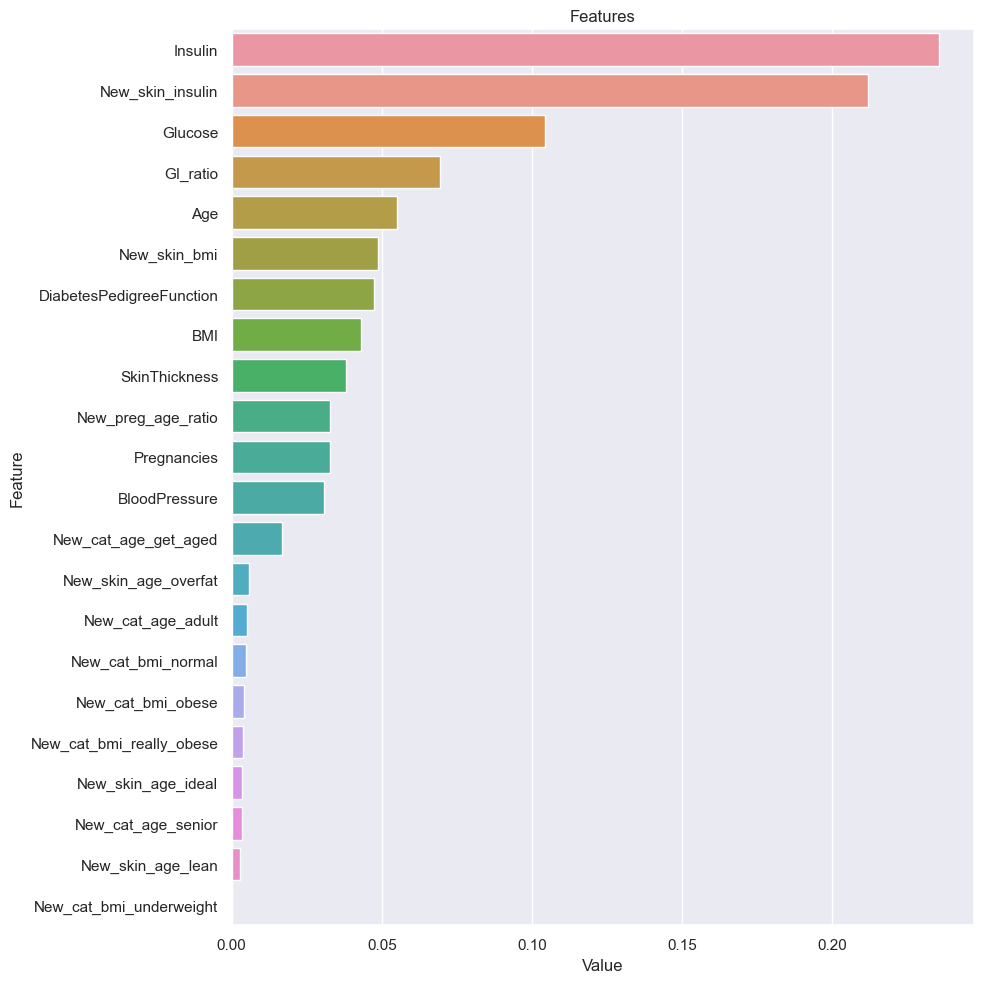

In [84]:
plot_importance(rf_model,X)